Euclidean Distance:
 [[ 0.          2.23606798  8.          6.32455532  6.08276253 10.
   7.61577311  7.28010989  3.        ]
 [ 2.23606798  0.          6.08276253  5.          4.          7.81024968
   6.08276253  5.09901951  2.82842712]
 [ 8.          6.08276253  0.          8.48528137  2.23606798  6.
   8.60232527  2.23606798  8.54400375]
 [ 6.32455532  5.          8.48528137  0.          6.40312424  6.
   1.41421356  6.40312424  3.60555128]
 [ 6.08276253  4.          2.23606798  6.40312424  0.          5.38516481
   6.70820393  1.41421356  6.32455532]
 [10.          7.81024968  6.          6.          5.38516481  0.
   5.09901951  4.12310563  8.54400375]
 [ 7.61577311  6.08276253  8.60232527  1.41421356  6.70820393  5.09901951
   0.          6.40312424  5.        ]
 [ 7.28010989  5.09901951  2.23606798  6.40312424  1.41421356  4.12310563
   6.40312424  0.          7.07106781]
 [ 3.          2.82842712  8.54400375  3.60555128  6.32455532  8.54400375
   5.          7.07106781  0.    

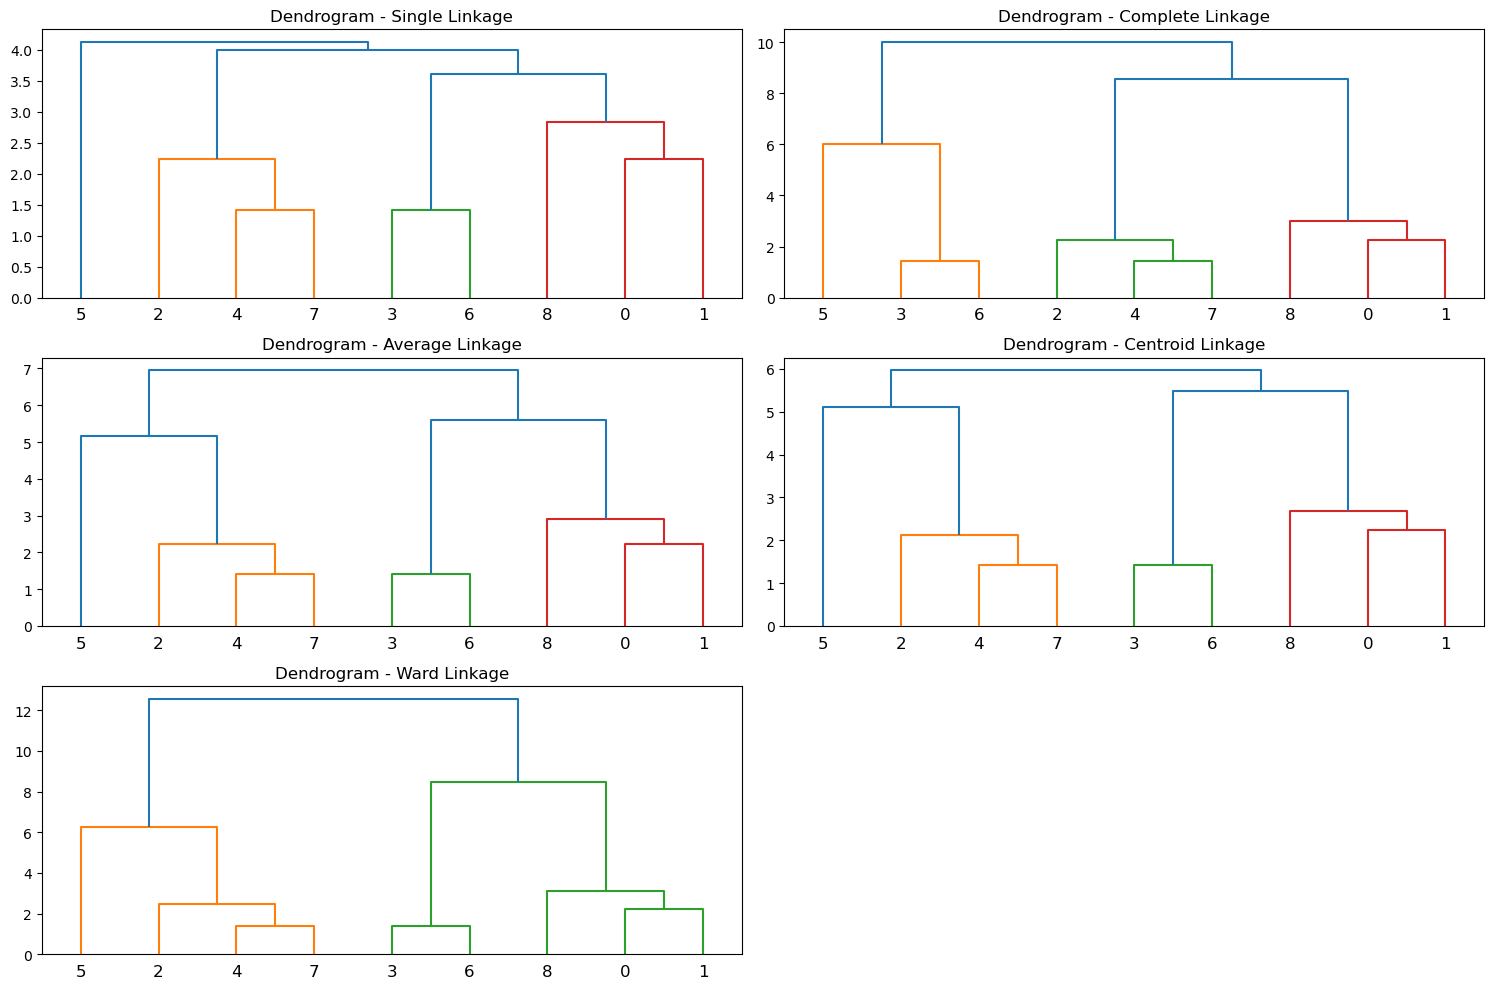

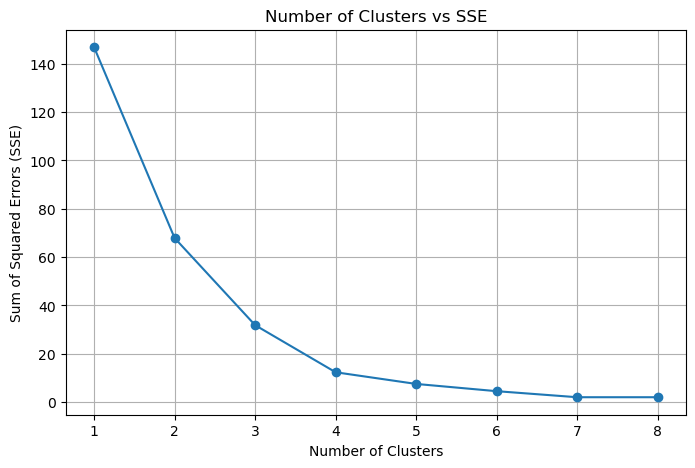

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform

points = np.array(
    [(1, 1), (3, 2), (9, 1), (3, 7), (7, 2), (9, 7), (4, 8), (8, 3), (1, 4)]
)
                                                                                                            
euclidean_dist = squareform(pdist(points, metric="euclidean"))
manhattan_dist = squareform(pdist(points, metric="cityblock"))
minkowski_dist = squareform(pdist(points, metric="minkowski", p=3))

print("Euclidean Distance:\n", euclidean_dist)
print("Manhattan Distance:\n", manhattan_dist)
print("Minkowski Distance:\n", minkowski_dist) 

linkage_methods = ["single", "complete", "average", "centroid", "ward"]
plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods):
    plt.subplot(3, 2, i + 1)
    Z = sch.linkage(points, method=method)
    sch.dendrogram(Z)
    plt.title(f"Dendrogram - {method.capitalize()} Linkage")

plt.tight_layout()
plt.show()

sse = []
for k in range(1, len(points)):
    Z = sch.linkage(points, method="ward")
    clusters = sch.fcluster(Z, k, criterion="maxclust")

    total_sse = 0
    for j in range(1, k + 1):
        cluster_points = points[clusters == j]
        if len(cluster_points) > 0:
            centroid = cluster_points.mean(axis=0)
        total_sse += np.sum((cluster_points - centroid) ** 2)
    sse.append(total_sse)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(points)), sse, marker="o")
plt.title("Number of Clusters vs SSE")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid()
plt.show()